In [121]:
library(data.table)
library(tidyverse)
library(magrittr)
library(plotly)
library(ggplot2)

library(broom) # for tidy statistical summaries
library(caret) # for regression performance measures
library(psych) # for pairwise comparisons
library(GGally) # for pairwise comparisons
library(lindia) # for qqplots
library(car)

In [122]:
odata <- fread("http://raw.githubusercontent.com/elifsakcay/ad48g-proje/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic%5B1%5D.csv")

In [123]:
odata %>% summary

    Gender               Age            Height          Weight      
 Length:2111        Min.   :14.00   Min.   :1.450   Min.   : 39.00  
 Class :character   1st Qu.:19.95   1st Qu.:1.630   1st Qu.: 65.47  
 Mode  :character   Median :22.78   Median :1.700   Median : 83.00  
                    Mean   :24.31   Mean   :1.702   Mean   : 86.59  
                    3rd Qu.:26.00   3rd Qu.:1.768   3rd Qu.:107.43  
                    Max.   :61.00   Max.   :1.980   Max.   :173.00  
 family_history_with_overweight     FAVC                FCVC      
 Length:2111                    Length:2111        Min.   :1.000  
 Class :character               Class :character   1st Qu.:2.000  
 Mode  :character               Mode  :character   Median :2.386  
                                                   Mean   :2.419  
                                                   3rd Qu.:3.000  
                                                   Max.   :3.000  
      NCP            CAEC              SMOKE    

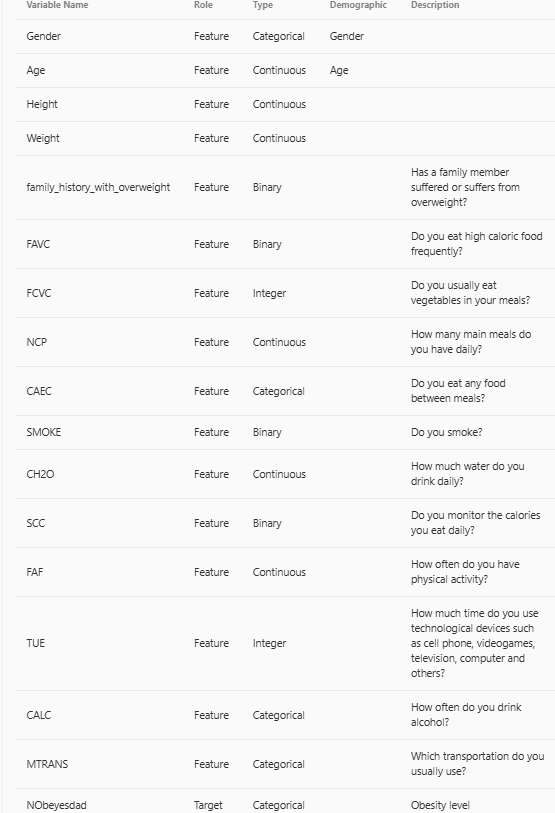

We didn't want to look at the relation between the variables in obesity data and weight basically as they must not be unhealthy if they are overweight. Since we did not have any variables related to thier fat ratios, the best we can look at was their bmi ratios despite the insufficinecy of this statistics as well in showing the fat-muscle distirbution ratio in weight. 

We added a new column and named it "bmi".

In [124]:
odata_bmi<- odata %>% mutate( bmi = Weight / Height ^2) #odata'yı yenilemekte sakınca yok bence bunu dümdüz odata olarak kaydedebiliriz.

Other than weight, height and age, There are some other continous variables like CH20, NCP etc in the dataset. However, since thier definitions are determined through categorical questions, we will turn them into factors.

Also, another issue here was these categorical-in-nature variables were in double format, so there was a need to first round them to integers and then transform these variables into factor format.

After roundig them, I realized that since there were some points rounded a value that was not in between our the boundaries of factor levels, I changed the boundary values for each of them and fitted them into the scale. 

In [125]:
knifefunc <- function(the_list){
        the_name <- names(the_list)
        the_unique_quantile <- the_list %>% unlist %>% quantile %>% unique
        the_list %>% unlist %>% as.numeric %>% cut( breaks = the_unique_quantile  , labels = c(1:(length(the_unique_quantile)-1)), include.lowest = T)        
    }

In [126]:
odata_bmi %<>% mutate_at(vars(FAF, FCVC, NCP, CH2O, TUE), BBmisc::normalize) #hocaya sor? FAF continuous
odata_bmi %<>% mutate_at(vars(FAF, FCVC, NCP, CH2O, TUE), knifefunc)
odata_bmi%>% select(FAF, FCVC, NCP, CH2O, TUE)


FAF,FCVC,NCP,CH2O,TUE
<fct>,<fct>,<fct>,<fct>,<fct>
1,1,2,2,2
4,3,2,4,1
4,1,2,2,2
4,3,2,2,1
1,1,1,2,1
1,1,2,2,1
2,3,2,2,1
4,1,2,2,1
2,3,2,2,2


In [127]:


SMOKE<-odata_bmi$SMOKE
odata_bmi$SMOKE <- factor(SMOKE, levels=c("no", "yes"))

CAEC<-odata_bmi$CAEC
odata_bmi$CAEC <- factor(CAEC, levels=c("no", "Sometimes", "Frequently","Always"))

CALC<-odata_bmi$CALC
odata_bmi$CALC <- factor(CALC, levels=c("no", "Sometimes", "Frequently","Always"))

SCC<-odata_bmi$SCC
odata_bmi$SCC <- factor(SCC, levels=c("no", "yes"))

history<-odata_bmi$family_history_with_overweight
odata_bmi$family_history_with_overweight <- factor(history, levels=c("no", "yes"))

MTRANS <- odata_bmi$MTRANS 
odata_bmi$MTRANS <- factor(MTRANS, levels=c("Walking","Bike","Motorbike","Automobile","Public_Transportation"))

FAVC<-odata_bmi$FAVC
odata_bmi$FAVC <- factor(FAVC, levels=c("no", "yes"))

Gender <-odata_bmi$Gender
odata_bmi$Gender <- factor(Gender, levels=c("Female", "Male"))

Descriptive graphics for both continuous and categorical variables:

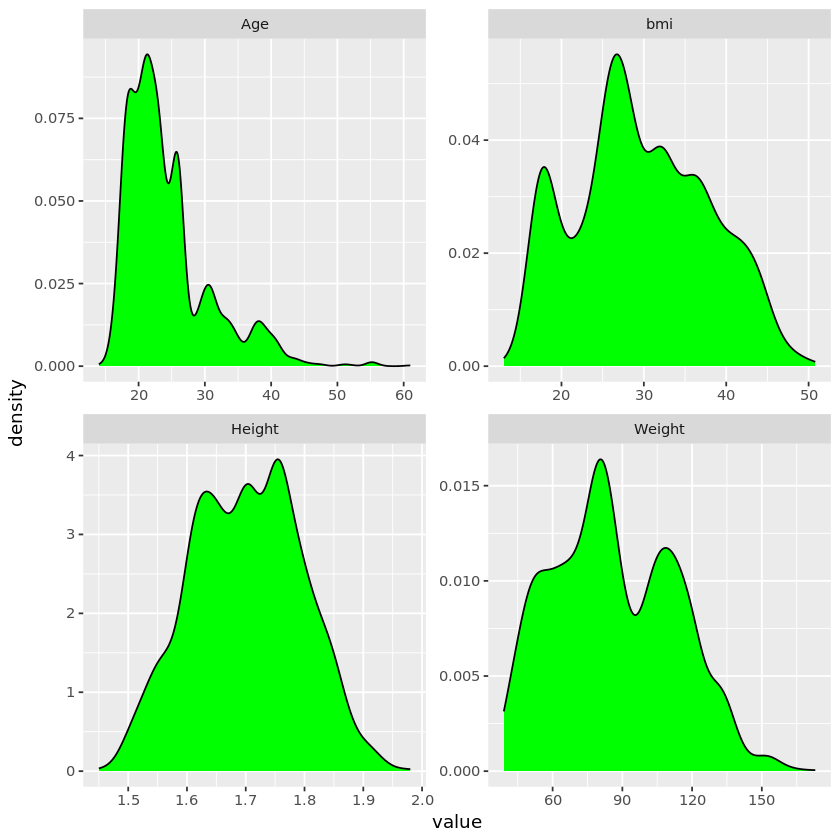

In [128]:
odata_bmi%>% select(Age, Height, Weight, bmi) %>%
    tidyr::gather() %>% # reshape into long format in columns "key" and "value"
    ggplot(aes(value)) + # plot value
        facet_wrap(~ key, scale = "free" ) + # divide into separate plots by key
        geom_density(fill = "green")  # get density plots

Warning message:
“attributes are not identical across measure variables; they will be dropped”


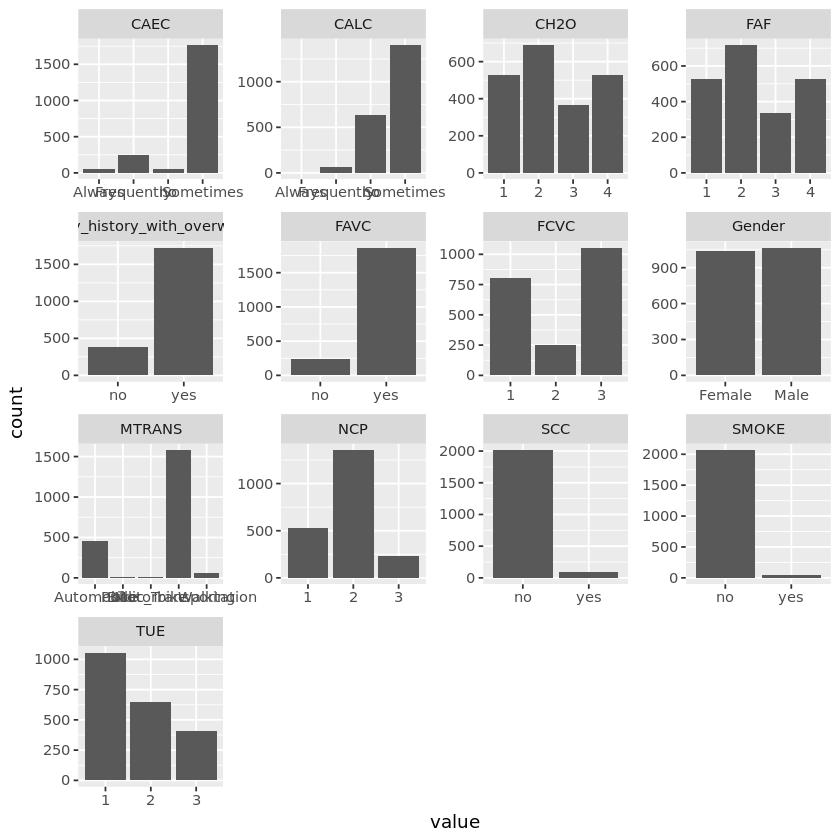

In [129]:
odata_bmi%>% select(!c(Age, Height, Weight, bmi, NObeyesdad)) %>%# select columns

    tidyr::gather() %>% # convert into long format for faceting
    ggplot(aes(x = value)) + # plot value
    facet_wrap(~ key, scales = "free") + # divide into separate plots by key
    geom_bar()

From the boxplots we created, we can say the categorical changes within;
Gender, 
CAEC, eating food between meals
SMOKE 
do not have a significant effect on bmi in our data.

But the rest show some correlations;

family_history_with_overweight,

FAVC, high caloried food consumption

FCVC, vegetable consumption

NCP, the number of meals in a day

CH2O, water consumption

SCC, keep track of calories

FAF, physical activity

TUE, the hours spent on social media

CALC, alcohol consumption

MTRANS, the type of transformation they use

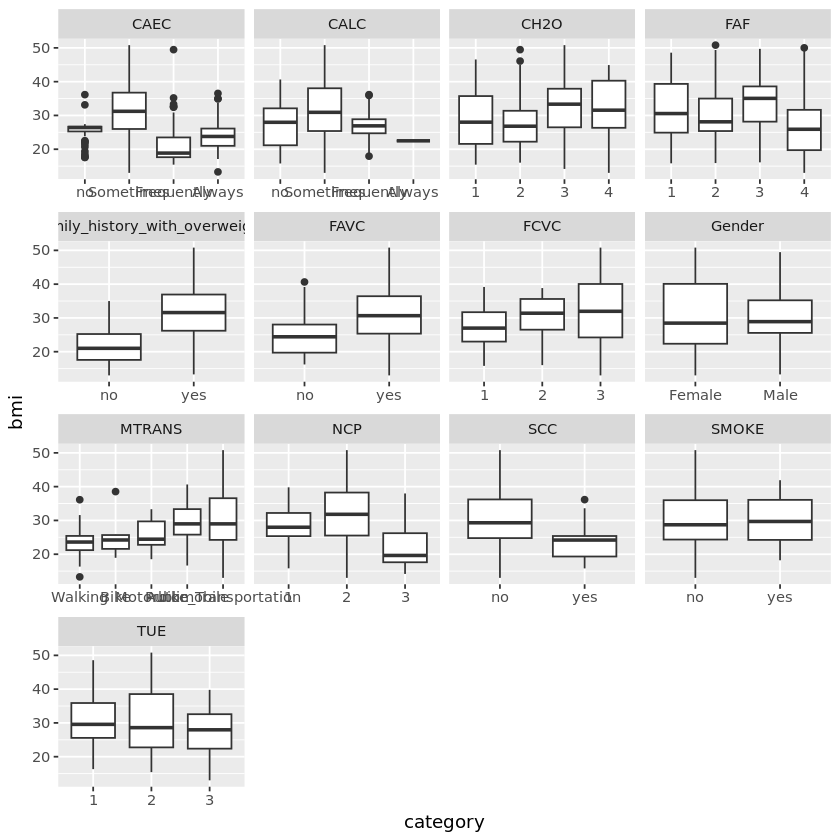

In [130]:
odata_bmi%>% pivot_longer(!c(Age, Height, Weight, bmi, NObeyesdad), names_to = "variable", values_to = "category") %>%
ggplot(aes(x = category, y = bmi)) +
geom_boxplot() +
facet_wrap(~ variable, scales = "free_x") ## hocaya sor!!!!!!!!!!!!!!!!!! 

Now, So far what we do is according to get trid of the outliers in our data, we calculated the Z scores in two tales with .05 for te sake of a a model estimating our BMI results better. 

In [131]:
meanbmi <- mean(odata_bmi %>% select(bmi) %>% unlist %>% unname)

In [ ]:
squared_deviance <- ((odata_bmi %>% select(bmi) %>%unlist %>%unname - meanbmi)) ^2

In [ ]:
stdev <- sum(squared_deviance/nrow(odata_bmi))^0.5

In [ ]:
odata_bmi %<>% mutate( z_bmi =( bmi - meanbmi) /stdev )

In [ ]:
odata_bmi%>% select(z_bmi) %>% sapply(quantile) %>% t()

In [ ]:
hist(odata_bmi %>% select(z_bmi)%>%unlist%>%unname)

In [ ]:
odata_bmi %<>%  filter( z_bmi %between% c(-1.96,1.96))

In [ ]:
nrow(odata_bmi)

In [ ]:
hist(odata_bmi %>% select(z_bmi)%>%unlist%>%unname)

We want to see if the data under the variables that can answer yes-no questions are distributed in a somewhat balanced way. To see it first we got rid off the continuous variables by keeping the factors. 

to determine a trashold, we divided the # rows to 2. To turned them into logical values, we used a basic logical tools and assigned these to the colums. After that, since "yes" and "no" logical values are corresponsing to 1 and 0, to implement some calculations, we used this feature. After subsetting the columns whose yes-no values cannot satisfy the treshold we created, what we had only was "Gender".

In [133]:
factors <- odata_bmi %>% keep(is.factor) %>% select(family_history_with_overweight, FAVC, SMOKE, SCC, Gender)
factors

family_history_with_overweight,FAVC,SMOKE,SCC,Gender
<fct>,<fct>,<fct>,<fct>,<fct>
yes,no,no,no,Female
yes,no,yes,yes,Female
yes,no,no,no,Male
no,no,no,no,Male
no,no,no,no,Male
no,yes,no,no,Male
yes,yes,no,no,Female
no,no,no,no,Male
yes,yes,no,no,Male


In [134]:
normx <- factors[,.N] / 2
normx

factors$family_history_with_overweight<-factors$family_history_with_overweight=="yes"
factors$FAVC<-factors$FAVC=="yes"
factors$SMOKE<-factors$SMOKE=="yes"
factors$SCC<-factors$SCC=="yes"
factors$Gender <- factors$Gender=="Female"

factors


[1] 1055.5

family_history_with_overweight,FAVC,SMOKE,SCC,Gender
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
TRUE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,TRUE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE


In [135]:
factors_select <- factors %>% 
colSums %>% # get total count of TRUE values
"-"(normx) %>% # subtract from half of row count
abs %>% # take absolute value
sort %>%#sort
.[. <= normx / 2] %>% # filter for those variables where the absolute difference if less than or equal to the quarter of total row count 
names # get the names

In [136]:
cor0 <- factors %>% select(all_of(factors_select)) %>% cor
cor0

,Gender
Gender,1


In [137]:
odata_bmi %<>% select(Gender,Age, bmi, TUE, NCP, MTRANS, FCVC, FAF, CH2O, CALC, CAEC)
odata_bmi

Gender,Age,bmi,TUE,NCP,MTRANS,FCVC,FAF,CH2O,CALC,CAEC
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Female,21,24.38653,2,2,Public_Transportation,1,1,2,no,Sometimes
Female,21,24.23823,1,2,Public_Transportation,3,4,4,Sometimes,Sometimes
Male,23,23.76543,2,2,Public_Transportation,1,4,2,Frequently,Sometimes
Male,27,26.85185,1,2,Walking,3,4,2,Frequently,Sometimes
Male,22,28.34238,1,1,Public_Transportation,1,1,2,Sometimes,Sometimes
Male,29,20.19509,1,2,Automobile,1,1,2,Sometimes,Sometimes
Female,23,24.44444,1,2,Motorbike,3,2,2,Sometimes,Sometimes
Male,22,19.70553,1,2,Public_Transportation,1,4,2,Sometimes,Sometimes
Male,24,20.19947,2,2,Public_Transportation,3,2,2,Frequently,Sometimes


Partititon: We set the train ratio 0.7 as we used 0.7 to built the model and 0.3 to test the model if it can give nice results. We also checked the mutuality below.

In [138]:
set.seed(1000)
train_ratio <- 0.7

In [139]:
train_indices <- odata_bmi[,sample(.N * train_ratio)]
train_data <- odata_bmi[train_indices]
test_data <- odata_bmi[-train_indices]

In [140]:
odata_bmi[,.N]
train_data[,.N]
test_data[,.N]

[1] 2111

[1] 1477

[1] 634

In [141]:
model1 <- lm(bmi ~ . , train_data)

daha insignificant olanları çıkarmıyorum, onu modeli iyileştirirken çıkarırız.

In [142]:
model1 %>% summary

model1 %>% tidy %>% filter(p.value < 0.1)


Call:
lm(formula = bmi ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7677  -2.6896  -0.0548   2.7095  29.6709 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 18.03653    1.12519  16.030  < 2e-16 ***
GenderMale                   1.27606    0.25670   4.971 7.45e-07 ***
Age                          0.26931    0.02321  11.604  < 2e-16 ***
TUE2                        -0.42709    0.28497  -1.499 0.134168    
TUE3                        -0.52954    0.31886  -1.661 0.096983 .  
NCP2                        -0.18411    0.26930  -0.684 0.494300    
NCP3                        -3.43550    0.39346  -8.731  < 2e-16 ***
MTRANSBike                  -1.08332    1.79516  -0.603 0.546290    
MTRANSMotorbike              0.89484    1.48749   0.602 0.547552    
MTRANSAutomobile            -0.31763    0.68751  -0.462 0.644145    
MTRANSPublic_Transportation  1.45759    0.62535   2.331 0.019897 *  
FCVC2

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),18.0365300,1.12518649,16.029814,2.269803e-53
GenderMale,1.2760628,0.25670388,4.970953,7.454004e-07
Age,0.2693117,0.02320938,11.603569,7.820836e-30
TUE3,-0.5295424,0.31886057,-1.660733,9.698290e-02
NCP3,-3.4354963,0.39346143,-8.731469,6.782093e-18
MTRANSPublic_Transportation,1.4575921,0.62534696,2.330853,1.989741e-02
FCVC3,-0.5900469,0.26957538,-2.188801,2.877010e-02
FAF2,-0.6641671,0.31814763,-2.087607,3.700727e-02
FAF4,-1.3933606,0.34618177,-4.024939,5.992918e-05
